## GRIPFEB22 - The Spark Foundation- Data Science & Business Analytics Internship

## Task_4 : Exploratory Data Analysis- Terrorism 

## Problem statement : Perform Exploratory Data Analysis on dataset 'Global Terrorism'

## By : Nagraj Desai

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## character encoding 

In [2]:
# It is used to encoding the dataset
import chardet
with open('globalterrorismdb_0718dist.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

## Loading the dataset

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1' )

C:\Users\vivo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# check shape of dataset
df.shape

(181691, 135)

In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Usefull points while selecting the Feature 

1 - Drop variables that have a very high % of missing values            
2 - Drop or review variables that have a very low variation           
3 - If two variables are highly correlated, keeping only one will help reduce dimensionality             
4 - Drop variables that have a very low correlation with the target             
5 - Forward/ Backward/ Stepwise selection              

## Drop columns containing more than 40% missing values

In [6]:
perc = 40.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [7]:
df.shape

(181691, 58)

In [8]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


## Select the important columns

In [9]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

## Rename the features

In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [11]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Day               181691 non-null  int64  
 3   Extended          181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   Region            181691 non-null  object 
 6   City              181257 non-null  object 
 7   Success           181691 non-null  int64  
 8   Suicide           181691 non-null  int64  
 9   Attack_Type       181691 non-null  object 
 10  Target_Type       181691 non-null  object 
 11  Attack_Group      181691 non-null  object 
 12  Weapon            181691 non-null  object 
 13  Number_of_Killed  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


## Missing Values

In [12]:
# chek the missing values
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Extended                0
Country                 0
Region                  0
City                  434
Success                 0
Suicide                 0
Attack_Type             0
Target_Type             0
Attack_Group            0
Weapon                  0
Number_of_Killed    10313
dtype: int64

In [13]:
# cannot fill the city names hence fill as zero
df['City'] = df['City'].fillna(0)


# fill the null values by the mean value
df['Number_of_Killed'] = df['Number_of_Killed'].replace(np.NaN, df['Number_of_Killed'].mean())

In [14]:
# No missing values
df.isnull().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
Region              0
City                0
Success             0
Suicide             0
Attack_Type         0
Target_Type         0
Attack_Group        0
Weapon              0
Number_of_Killed    0
dtype: int64

In [15]:
# check the duplicate rows
print(df.duplicated().sum())

15529


In [16]:
# drop the duplicate rows
print(df.drop_duplicates())

        Year  Month  Day  Extended             Country  \
0       1970      7    2         0  Dominican Republic   
1       1970      0    0         0              Mexico   
2       1970      1    0         0         Philippines   
3       1970      1    0         0              Greece   
4       1970      1    0         0               Japan   
...      ...    ...  ...       ...                 ...   
181686  2017     12   31         0             Somalia   
181687  2017     12   31         0               Syria   
181688  2017     12   31         0         Philippines   
181689  2017     12   31         0               India   
181690  2017     12   31         0         Philippines   

                             Region           City  Success  Suicide  \
0       Central America & Caribbean  Santo Domingo        1        0   
1                     North America    Mexico city        1        0   
2                    Southeast Asia        Unknown        1        0   
3              

In [17]:
# count of Terrorist Activities Each Year
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

## Visualisation

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

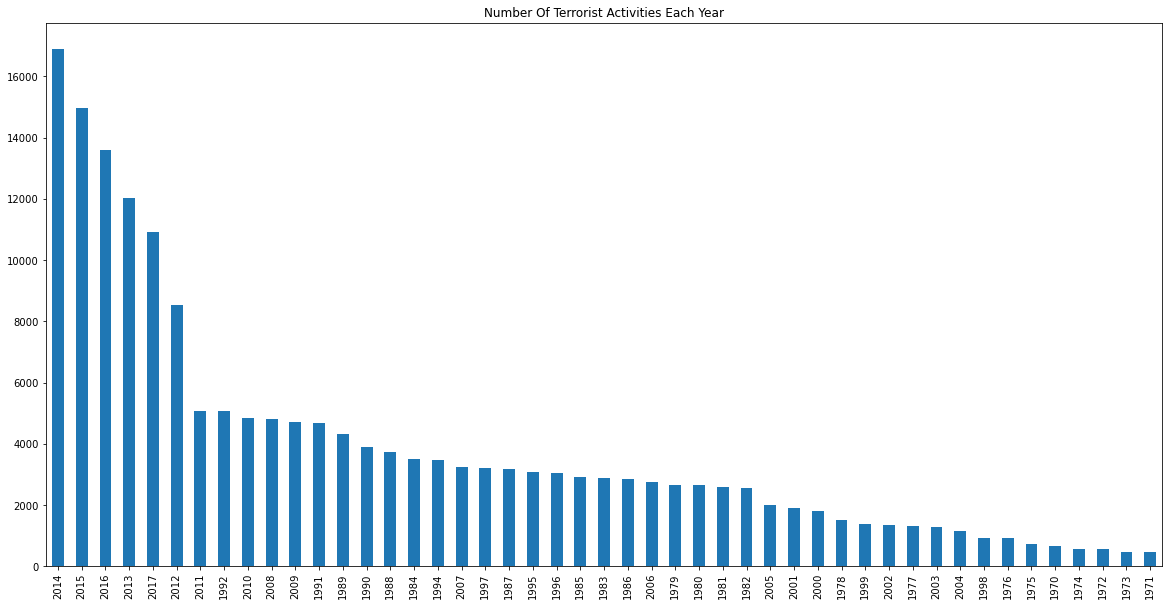

In [18]:
# Year
df['Year'].value_counts().plot(kind='bar',figsize=[20,10]) 
plt.title('Number Of Terrorist Activities Each Year')

***From 2012 Terrorist activities increases rapidly***           
At 2011 Terrorist activities are approximately 4500 and in 2012 it is approximately 8300 hence we can see a rapidly increases    in this one year

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Countries')

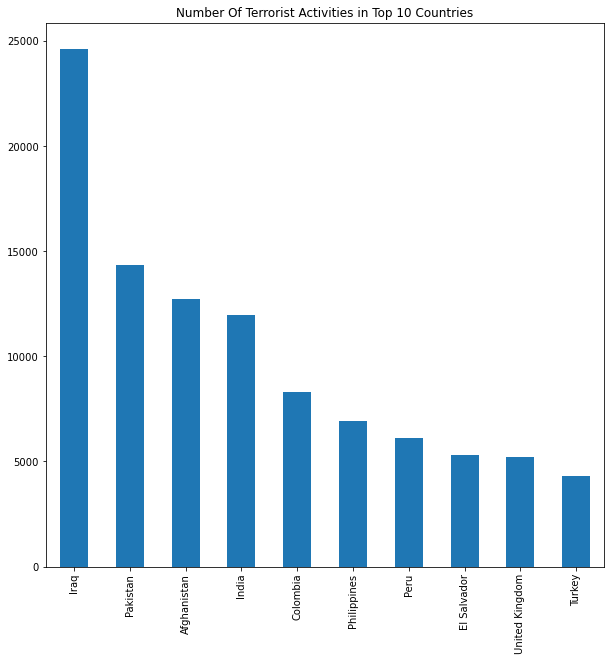

In [19]:
# Country
df['Country'].value_counts().head(10).plot(kind='bar',figsize=[10,10]) 
plt.title('Number Of Terrorist Activities in Top 10 Countries')

 ***Iraq has highest number of Terrorist anctivities followed by Pakistan, Afghanistan, India, etc.***

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Cities')

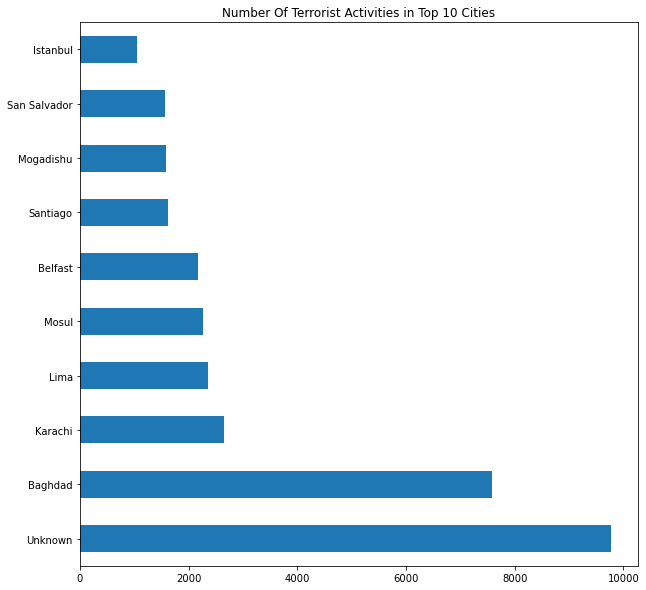

In [20]:
# city
df['City'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Cities')

***Baghdad city has highest number of Terrorist anctivities followed by Karachi, Lima, Mosul, etc.***

Text(0.5, 1.0, 'Number Of Terrorist Activities in Region')

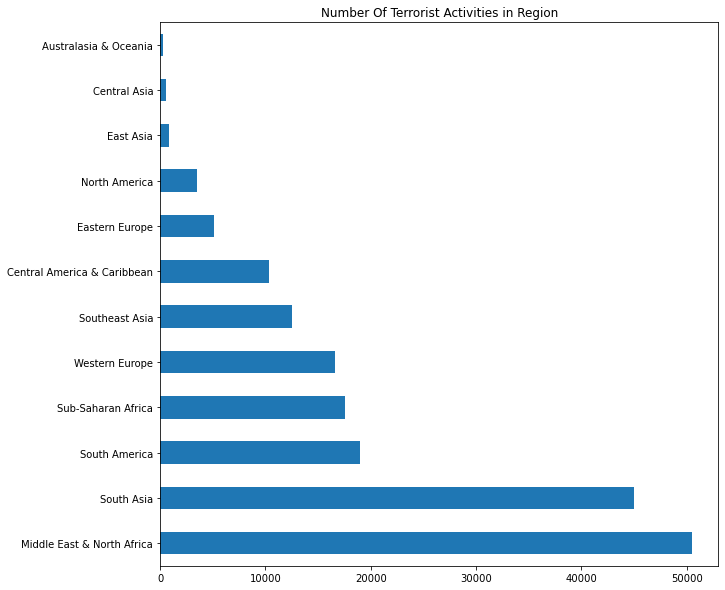

In [21]:
# Region
df['Region'].value_counts().plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Region')

***South Asia has highest number of Terrorist anctivities followed South America, Sub-Saharan Africa, etc.***

Text(0.5, 1.0, 'Methods of Attack')

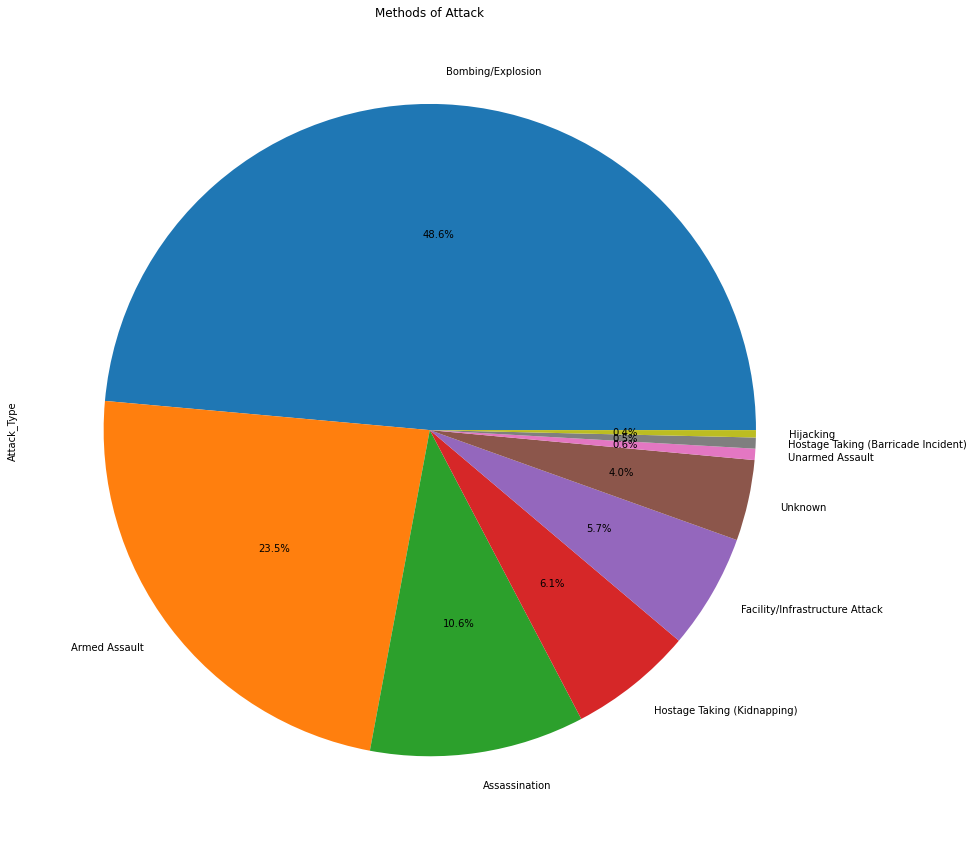

In [22]:
# Attack type
df['Attack_Type'].value_counts().plot(kind='pie',figsize=[15,15],autopct='%1.1f%%')
plt.title("Methods of Attack")

***1 -> The maximum attacks are done by using Bombing/Explosion i.e. 48.6%         
2 -> The second maximum is Armed Assault i.e. 23.5%           
3 -> The third maximum is Assassination i.e.10.6%***

C:\Users\vivo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


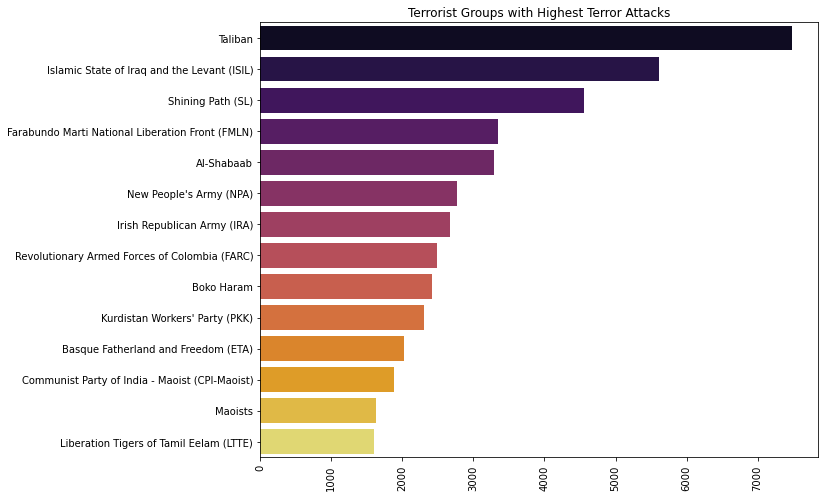

In [23]:
# Terrorist group
sns.barplot(df['Attack_Group'].value_counts()[1:15].values,df['Attack_Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

***1 - In this all Terrorist attacks maximum attacks are done by Taliban.            
2 - Second group is Islamic State of Iraq and the Levant.          
3 - Third group is Shining Path.*** 